In [2]:
# Importing Necessary Libraries
# Numerical libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.7 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=5b641d934171775621ba3fd1d6febc431df0d87a56708920d8d24c6e1257e722
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=cd49e62205d12e9c958e7a9e307f4ecdcfb4ffeea96a44e9344b4798a21f8d11
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found exis

# Data Loading and Integration

* Each group is assigned three sectors, as presented in the link below:
https://docs.google.com/spreadsheets/d/16-7e3dNk_h02Vd3F_BtrbrQ27dbO7pIe4d-N1kRrI24/edit?usp=sharing

* (4 pts) Your group must select ten stocks per sector (thirty stocks in total). You must grab daily data for your assets using Python (e.g., check the code at https://drive.google.com/file/d/1cQxGg7hdXfqMaUyBmYTk8kH9JTTwLLJR/view?usp=sharing).
HINT: If you update the Yahoo Finance code that has been provided to you and return monthly data, this becomes quite easy to implement:
Hint: just change interval='1mo' to interval='1d'
interval: {“1d”, “1wk”, “1mo”}. Refers to the interval to sample the data: “1d”= daily, “1wk”= weekly, “1mo”=monthly.
https://algotrading101.com/learn/yahoo-finance-api-guide/
* For training, you will use daily data from January 1, 2017 to December 31, 2021 (see below for details). For evaluating the performance of the strategies, you will use daily data from January 1, 2022 to December 31, 2022. You must check the quality of your data and, if necessary, clean it (i.e., remove entries of days for which information is missing) (-2 pts otherwise).
(3 pts) Present one time-series visualization (value of the stocks over time) per sector (so you will have three visualizations of time-series, one per sector).
(3 pts) Discuss what you see in each visualization plot (e.g., volatility over time).


In [11]:
# Assigning Stocks to tickers_list to scrape
tickers_list =  ['AMZN','TSLA','HD','TM','MCD','NKE','SBUX','LOW','BABA','F','HON','UNP','UPS','GE','CAT','RTX','BA','SIEGY','DE','LMT','AAPL','MSFT','NVDA','AVGO','ADBE','CSCO','ACN','CRM','AMD','INTU']


In [13]:
# pull historical price data for each stocks to match with new score
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2020',interval='1d') for ticker in tickers_list}
dow_prices #printing it to check the historical data

{'AMZN':                   open        high         low       close    adjclose  \
 2017-01-03   37.896000   37.938000   37.384998   37.683498   37.683498   
 2017-01-04   37.919498   37.984001   37.709999   37.859001   37.859001   
 2017-01-05   38.077499   39.119999   38.013000   39.022499   39.022499   
 2017-01-06   39.118000   39.972000   38.924000   39.799500   39.799500   
 2017-01-09   39.900002   40.088501   39.588501   39.846001   39.846001   
 ...                ...         ...         ...         ...         ...   
 2020-12-23  160.250000  160.506500  159.208496  159.263504  159.263504   
 2020-12-24  159.695007  160.100006  158.449997  158.634506  158.634506   
 2020-12-28  159.699997  165.199997  158.634506  164.197998  164.197998   
 2020-12-29  165.496994  167.532501  164.061005  166.100006  166.100006   
 2020-12-30  167.050003  167.104996  164.123505  164.292496  164.292496   
 
                volume ticker  
 2017-01-03   70422000   AMZN  
 2017-01-04   50210000   A

In [15]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the AMAZON (one sample)
prep_data = pd.DataFrame(dow_prices['AMZN']['adjclose']).rename(columns = {"adjclose":"AMZN"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data.head()

,AMZN,TSLA,HD,TM,MCD,NKE,SBUX,LOW,BABA,F,...,AAPL,MSFT,NVDA,AVGO,ADBE,CSCO,ACN,CRM,AMD,INTU
2017-01-03,37.683498,14.466000,114.269157,118.550003,101.918915,48.360630,48.071976,62.386333,88.599998,8.943367,...,27.023708,57.138721,25.138283,142.199173,103.480003,24.589520,104.547813,70.540001,11.43,108.695801
2017-01-04,37.859001,15.132667,115.281570,121.190002,101.799652,49.374733,48.627815,63.142551,90.510002,9.355373,...,26.993462,56.883072,25.724783,141.186523,104.139999,24.443350,104.799164,72.800003,11.43,108.913651
2017-01-05,39.022499,15.116667,113.920326,120.440002,101.987099,49.365437,49.036022,62.491852,94.370003,9.071233,...,27.130730,56.883072,25.071745,138.961929,105.910004,24.500195,103.228157,72.790001,11.24,109.586197
2017-01-06,39.799500,15.267333,113.605515,120.129997,102.890228,50.156235,49.617924,62.386333,93.889999,9.064126,...,27.433193,57.376122,25.406887,140.803818,108.300003,24.548916,104.404182,73.800003,11.32,111.020737
2017-01-09,39.846001,15.418667,114.269157,119.739998,102.609055,49.663147,50.547226,62.491852,94.720001,8.971782,...,27.684467,57.193512,26.436964,141.106796,108.570000,24.508314,103.237144,73.959999,11.49,110.688232


In [18]:
#Size of the data, checking rows and columns from the scraped data
x = prep_data.shape
print("Number of rows : ", x[0])
print("Number of stocks : ", x[1])

Number of rows :  1006
Number of stocks :  30


In [20]:
prep_data.isna().sum().sum() # Checking Null Values in the data

0

In [19]:
# create return features for each ticker,
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,AMZN,TSLA,HD,TM,MCD,NKE,SBUX,LOW,BABA,F,...,AAPL,MSFT,NVDA,AVGO,ADBE,CSCO,ACN,CRM,AMD,INTU
2017-01-04,0.004657,0.046085,0.008860,0.022269,-0.001170,0.020970,0.011563,0.012122,0.021558,0.046068,...,-0.001119,-0.004474,0.023331,-0.007121,0.006378,-0.005944,0.002404,0.032039,0.000000,0.002004
2017-01-05,0.030732,-0.001057,-0.011808,-0.006189,0.001841,-0.000188,0.008395,-0.010305,0.042647,-0.030372,...,0.005085,0.000000,-0.025386,-0.015756,0.016996,0.002326,-0.014991,-0.000137,-0.016623,0.006175
2017-01-06,0.019912,0.009967,-0.002763,-0.002574,0.008855,0.016019,0.011867,-0.001689,-0.005086,-0.000783,...,0.011148,0.008668,0.013367,0.013255,0.022566,0.001989,0.011392,0.013876,0.007117,0.013091
2017-01-09,0.001168,0.009912,0.005842,-0.003246,-0.002733,-0.009831,0.018729,0.001691,0.008840,-0.010188,...,0.009159,-0.003183,0.040543,0.002152,0.002493,-0.001654,-0.011178,0.002168,0.015018,-0.002995
2017-01-10,-0.001280,-0.006096,0.013327,0.000167,-0.001495,-0.005058,-0.005498,0.001970,0.021432,0.017419,...,0.001008,-0.000319,-0.007550,0.020343,-0.002855,0.006627,0.000522,0.000270,-0.004352,-0.003433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,-0.006627,0.008808,-0.000852,0.002587,0.000472,-0.004844,-0.003418,-0.013243,0.001368,0.022753,...,-0.006976,-0.013039,-0.020259,-0.017640,-0.014400,-0.006937,-0.007824,-0.016179,-0.017282,-0.008027
2020-12-24,-0.003949,0.024443,0.004114,-0.004565,-0.002971,-0.001129,-0.000490,0.002093,-0.133422,-0.014460,...,0.007712,0.007827,-0.001191,0.014102,0.005937,0.003605,-0.000544,-0.007255,0.002840,0.011249
2020-12-28,0.035071,0.002901,-0.006164,0.014156,0.012441,0.005862,0.022841,-0.004485,0.001622,0.003386,...,0.035766,0.009921,-0.007215,0.000973,-0.001820,0.008532,0.009250,-0.005049,-0.002287,-0.000105
2020-12-29,0.011584,0.003466,-0.011365,0.004849,-0.006121,-0.006038,0.012363,-0.009257,0.062511,-0.007874,...,-0.013315,-0.003601,0.003353,-0.006576,0.006333,-0.006233,-0.007394,-0.009704,-0.010699,-0.007321


In [21]:
return_data.shape # Shape of the data after taking the difference of the data

(1005, 30)

# Data Visualization of the Time Series

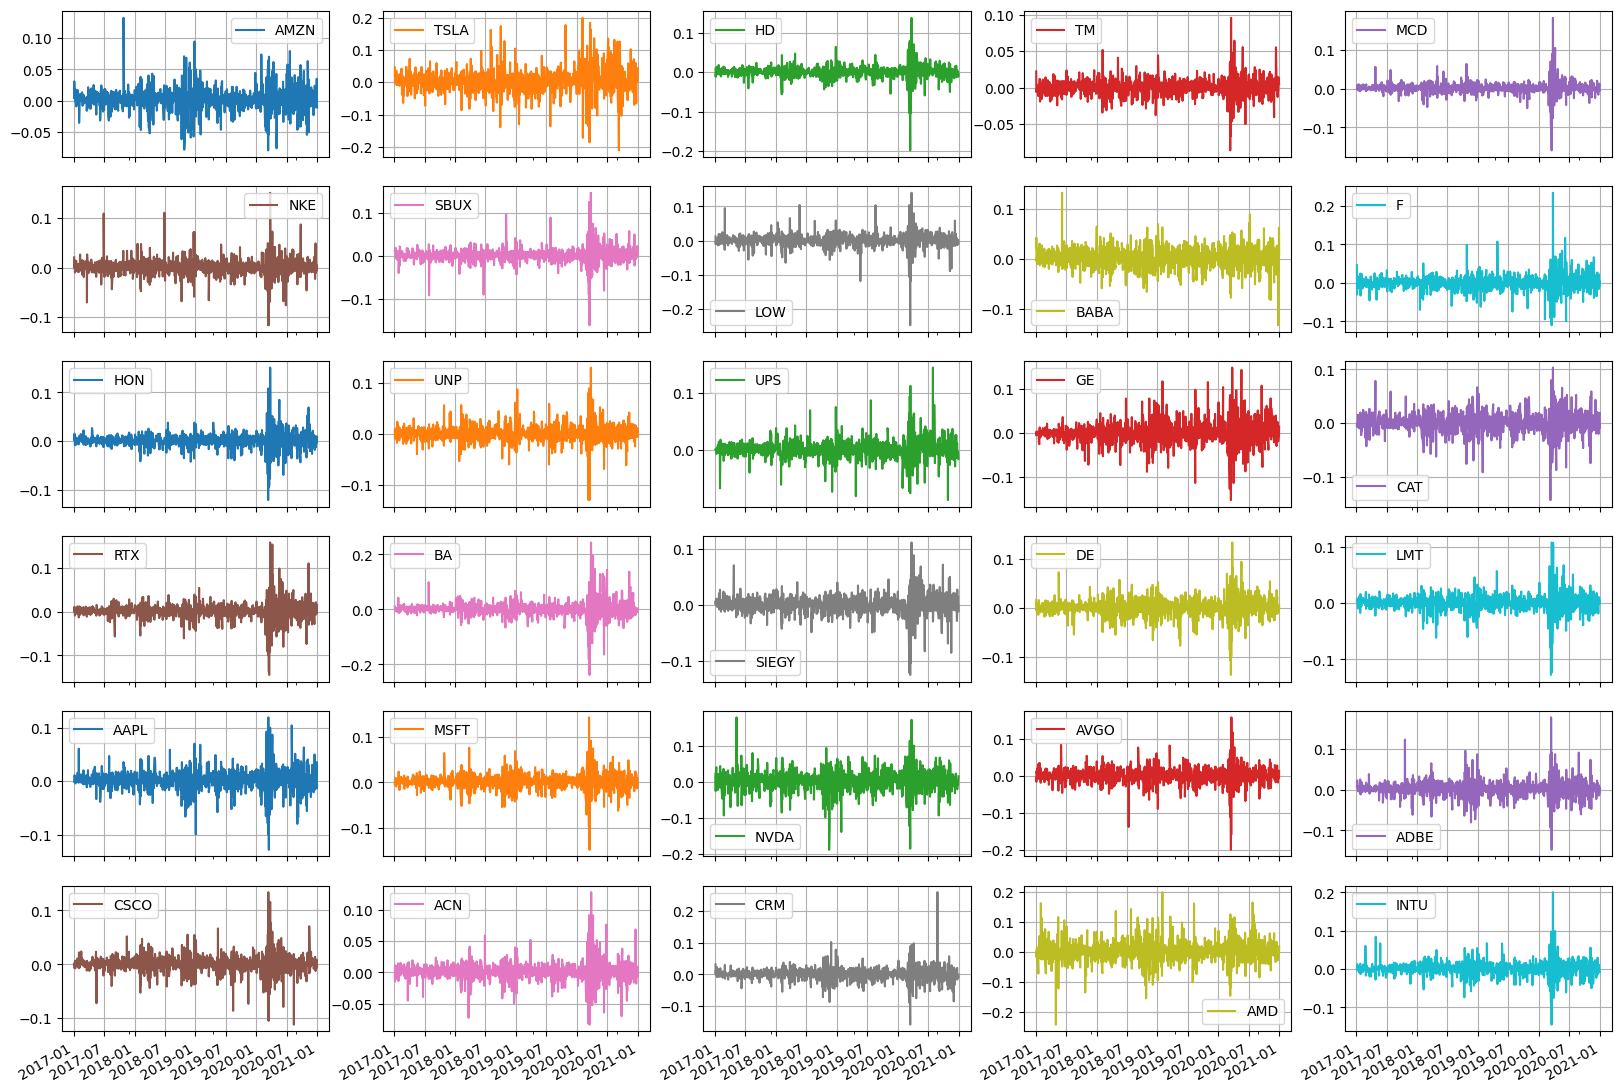

In [26]:
# Stock prices over the period of time
return_data.plot(subplots=True,
        grid=True,
        layout=(6,5),
         figsize=(20,15))
plt.show()

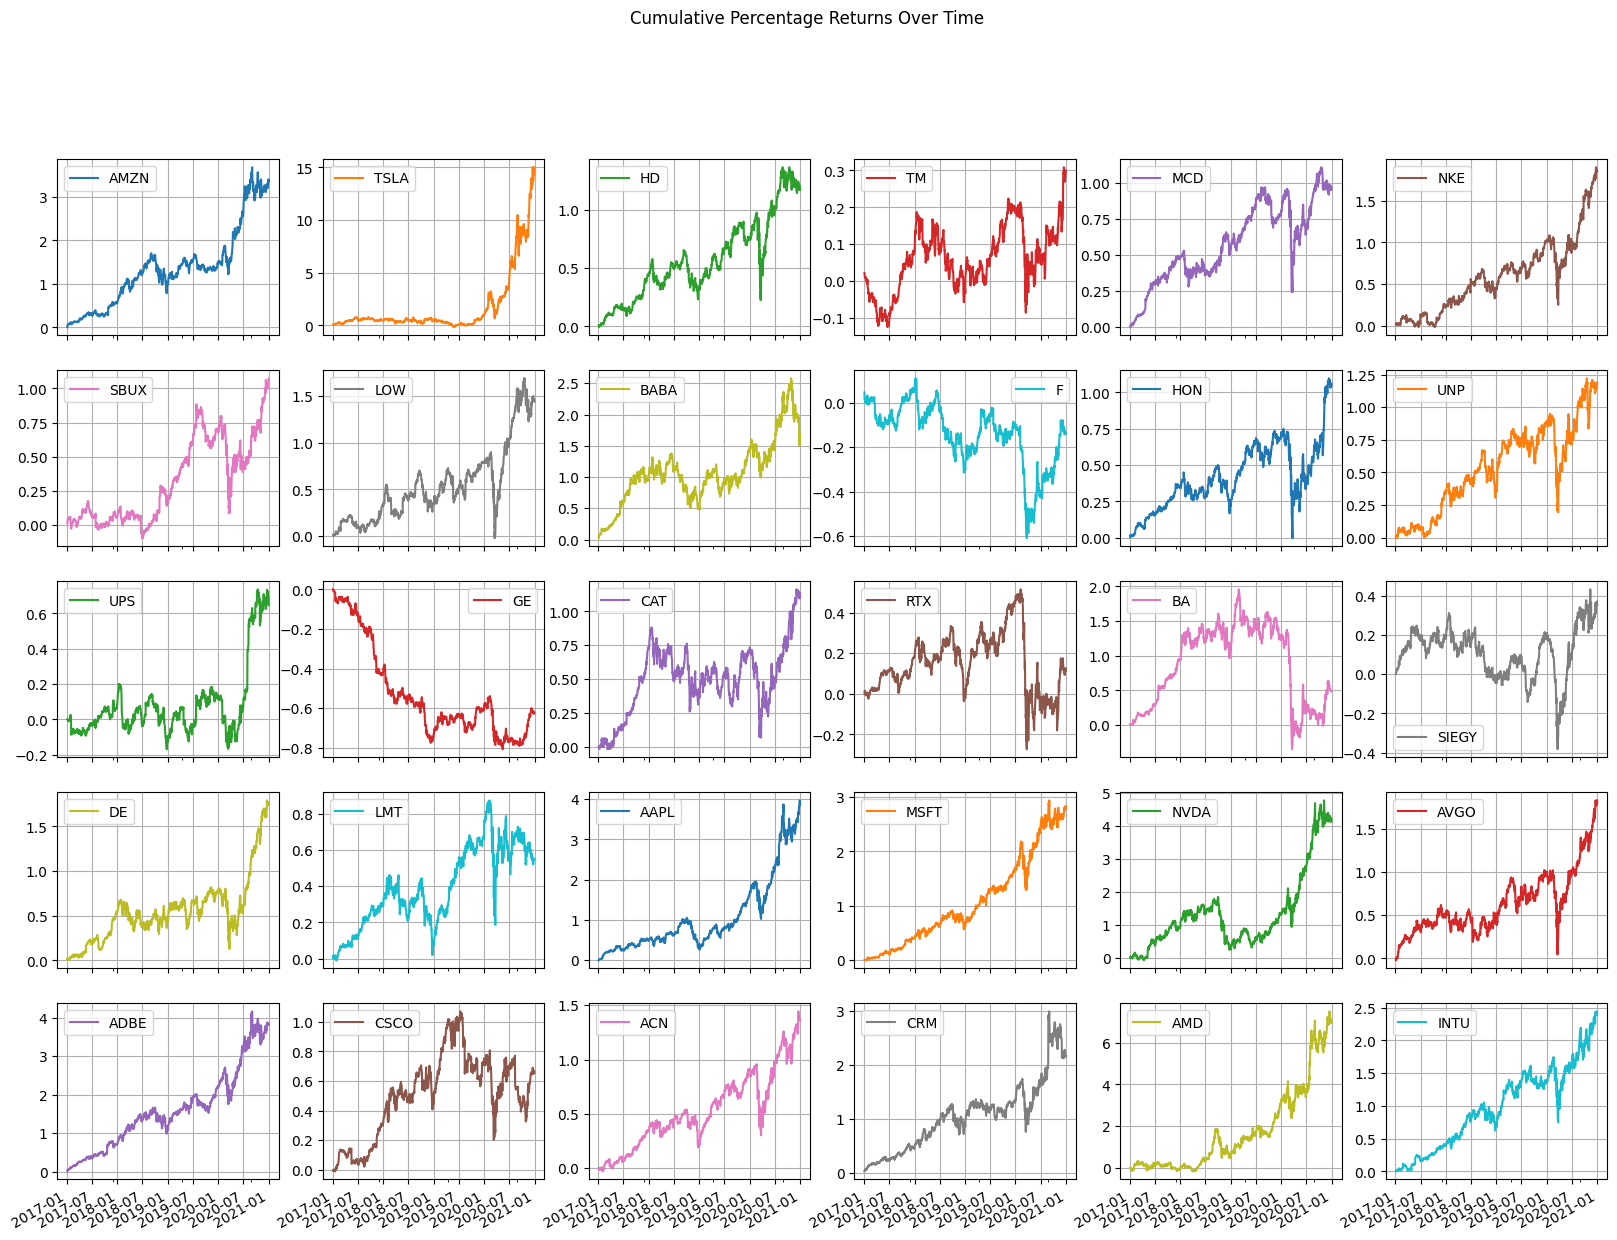

In [27]:
cumulative_returns = (1 + return_data).cumprod() - 1

# Plot the cumulative returns
cumulative_returns.plot(subplots=True,
                        grid=True,
                        layout=(5, 6),  # Adjust the layout as needed
                        figsize=(20, 15),
                        title="Cumulative Percentage Returns Over Time")

plt.show()

# Exploratory Data Analysis
* (15 pts) For each sector, you must apply the 8-21 Momentum Trading Strategy to each selected stock using daily data from the year 2021. We do not want to see 30 copies of the same code blocks, so you must use functions to keep your notebook concise (-7 pts otherwise).
* (5 pts) For each sector, you must plot the performance of the 8-21 Momentum Trading Strategy for each stock (i.e., one plot with ten curves, one per stock). More precisely, we want to see how the investment in each stock changed over time (like a traditional stock performance curve). Note that this plot differs from the ones in the Momentum Trading notebook!
* Present a conclusion for each sector and mention explicitly the top-three performing stocks of each sector; nine stocks will be mentioned in this discussion (-3 pts if this discussion is missing).


# Momentum Trading for Stock Selection

* (15 pts) For each sector, you must apply the 8-21 Momentum Trading Strategy to each selected stock using daily data from the year 2021. We do not want to see 30 copies of the same code blocks, so you must use functions to keep your notebook concise (-7 pts otherwise).
* (5 pts) For each sector, you must plot the performance of the 8-21 Momentum Trading Strategy for each stock (i.e., one plot with ten curves, one per stock). More precisely, we want to see how the investment in each stock changed over time (like a traditional stock performance curve). Note that this plot differs from the ones in the Momentum Trading notebook!
* Present a conclusion for each sector and mention explicitly the top-three performing stocks of each sector; nine stocks will be mentioned in this discussion (-3 pts if this discussion is missing).



# Optimization Model
* (10 pts) Run the portfolio allocation model for different and adequate risk levels using the nine stocks selected in the previous step. Namely, we want to see when the risk levels are too small and when the risk levels are too large. (Warning: the risk levels used in class may be too small or too big for your assets - you will need to test different ranges to find an adequate one).
You should consider at least 100 risk levels (-3 pts)
At least one risk level tested by your code must be discarded for being too small and leading to an infeasible problem (-3 pts).
You should not set any lower bound on the expected returns (-5 pts if you add such a constraint to your model - be careful with copy and paste!).
You should run the optimization model once per risk level only, i.e., your notebook should only have the code block that removes infeasible solutions  (-3 pts if the optimization model is unnecessarily executed for the same risk level more than once, e.g., without removing infeasible solutions - be careful with copy and paste!)
You should use daily data from January 1, 2017, to December 31, 2021, to train your model (-3 points if an incorrect period is used).
*(5 pts) Show how your allocation into different stocks will vary for different risk levels.
The plot must show the efficient frontier reaching the plateau (-2 pts)
The plateau should not be more than 25% of the plot (-2 pts)
The plot should not contain infeasible allocations (-2 pts)
The plot must have a legend (-2 pts)
The plot must show the results of at least 80% of the risk levels (-2 pts)
* (5 pts) Show the shape of the efficient frontier for different risk levels.
The plot must show the efficient frontier reaching the plateau (-2 pts)
The plateau should not be more than 25% of the plot (-2 pts)
The plot should not contain infeasible allocations (-2 pts)
The plot must have a legend (-2 pts)
The plot must show the results of at least 80% of the risk levels (-2 pts)
Select one of the portfolio allocations returned by the optimization model containing exactly three stocks (-3 points if fewer or more assets are used). The set of stocks and the allocation must be extracted from the MPT model (-3 points if another allocation is used; minor roundings are acceptable). This portfolio allocation will be used in the analysis.


# Analysis

Let’s see how you would have applied the following investment strategies in 2022. You can suppose you have $100,000 to invest. You should use the portfolio allocation selected by the MPT model (-3 points if a different allocation is used). Fractional shares are okay, i.e., if the stock costs $100, but your allocation restricts the purchase to $50, you will buy 0.5 shares of this stock (this is not a simplification; this happens in practice!). Your solution will not be evaluated based on the returns of your portfolio, i.e., if you lose money, it’s OK!

*(5 pts) Buy-and-Hold strategy for the MPT portfolio: Create a table that shows the amount of money invested in each stock of your portfolio on the first day of each month (i.e., how much money is currently invested in each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022.
(10 pts) 8-21 Momentum trading strategy on the S&P 500 index (^GSPC): In this investment, you should apply the 8-21 Momentum Trading strategy to the S&P 500 index (^GSPC), as it was a stock. Create a table that shows the value of each position in your portfolio on the first day of each month (i.e., how much money is currently allocated to each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022. When computing the moving averages, you must consider the last days of 2021; therefore, in principle, your model should be able to buy the stocks on Jan 1, 2022 (deduction of 3 points if the last days of 2021 are not used).  
* (5 pts) Buy-and-Hold strategy for the S&P 500 index (^GSPC): Create a table that shows the amount of money invested in ^GSPC on the first day of each month (i.e., how much money is currently invested in each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022 (when we imagine you sold your stocks).
* (5 pts) Show the performance of each of the three strategies above in a single plot. Using the plot, compare and analyze the results obtained by the three strategies.  
Your plot must have a legend (-2 pts)
Your plot must have labels (-2 pts)


# Conclusion

(5 pts) Provide some closing thoughts and insights (five to ten bullets) on what you have learned from your Models and the Analysis. We will deduct points if the conclusion has only obvious comments (e.g., “We used MPT to compute a portfolio allocation” is not an insight).
List each group member’s contribution to the project and effort, i.e., what each person did (-2 pts if absent).
